# Model Fitness

## Paso 1 - Descarga de datos

In [ ]:
import pandas as pd

# Descargar el dataset de Model Fitness
gym_churn = pd.read_csv('/datasets/gym_churn_us.csv')

# Mostrar las dimensiones del dataset
print(f"Dimensiones del dataset: {gym_churn.shape} (filas, columnas)")

# Mostrar las primeras 5 filas del dataset
print("\nPrimeras 5 filas del dataset:")
print(gym_churn.head())

# Mostrar información general del dataset
print("\nInformación general del dataset:")
gym_churn.info()

Dimensiones del dataset: (4000, 14) (filas, columnas)

Primeras 5 filas del dataset:
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0

## Paso 2 - EDA


--- Conteo de valores ausentes por columna ---
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Conclusión: No hay valores ausentes en el dataset, todos los 'Non-Null Count' son 4000.

--- Estadísticas descriptivas del dataset ---
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957     

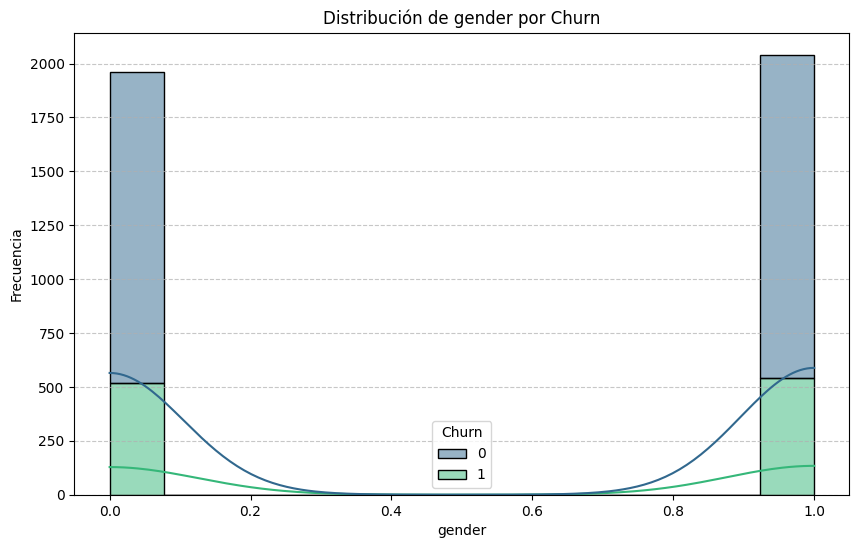

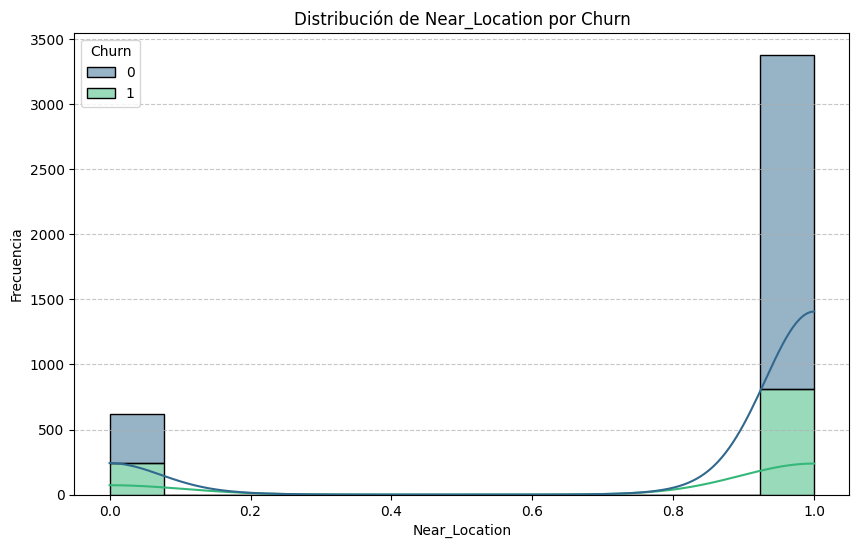

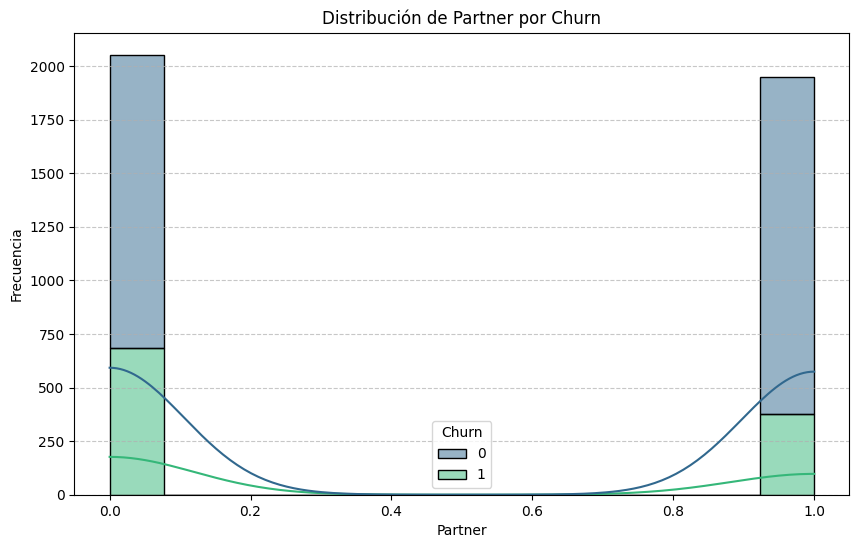

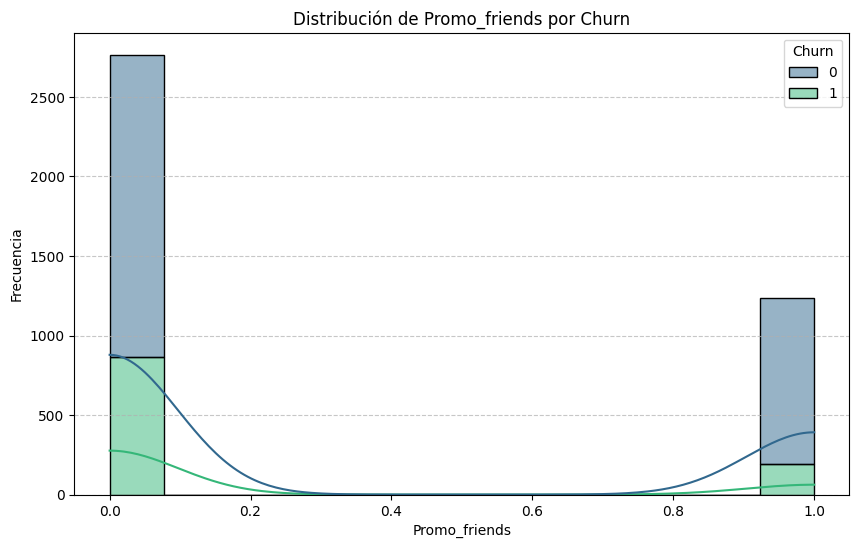

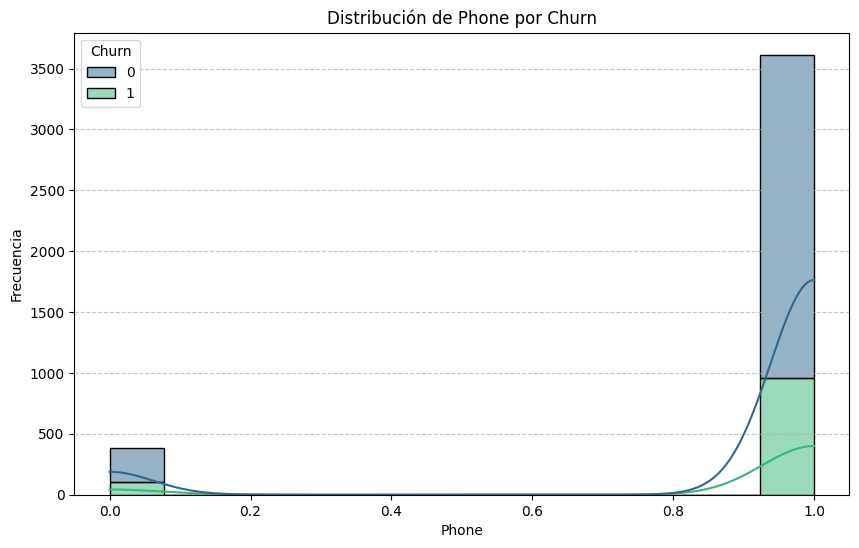

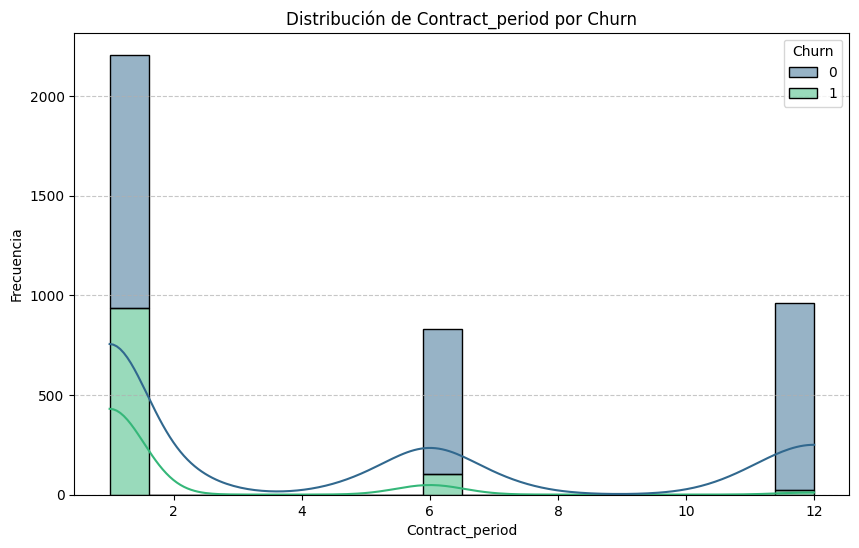

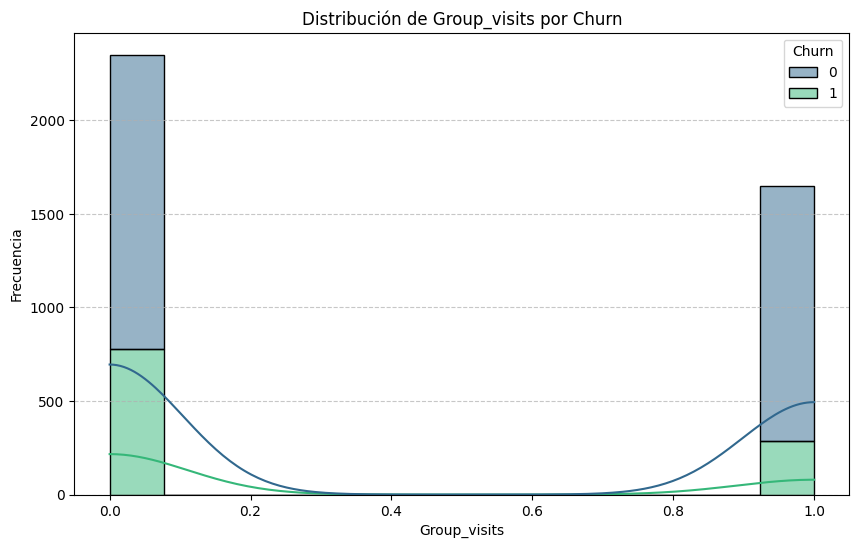

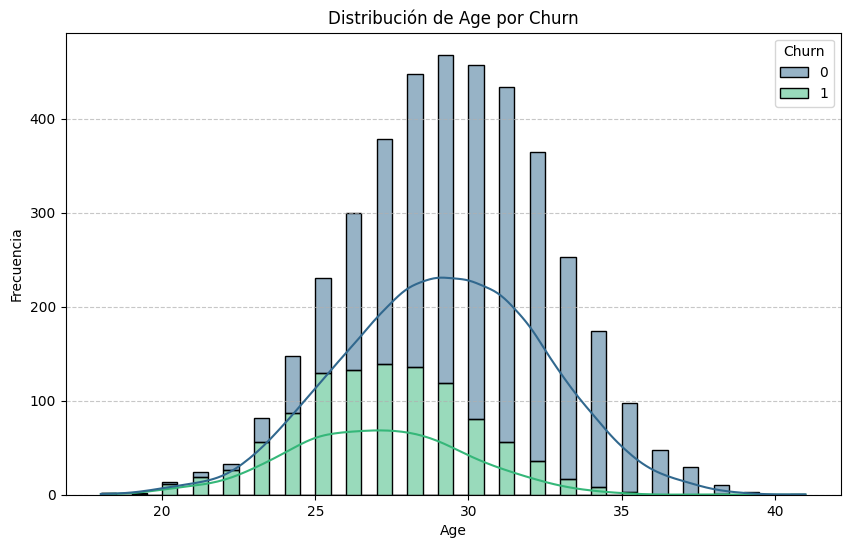

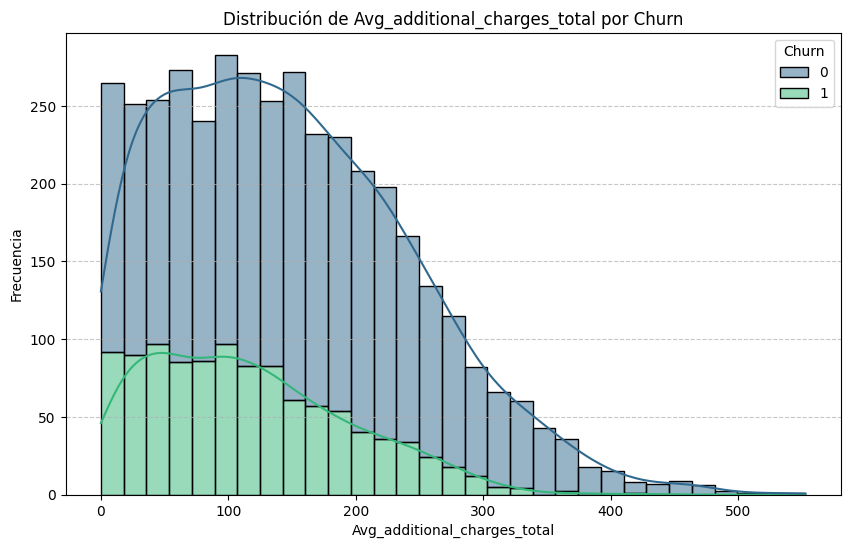

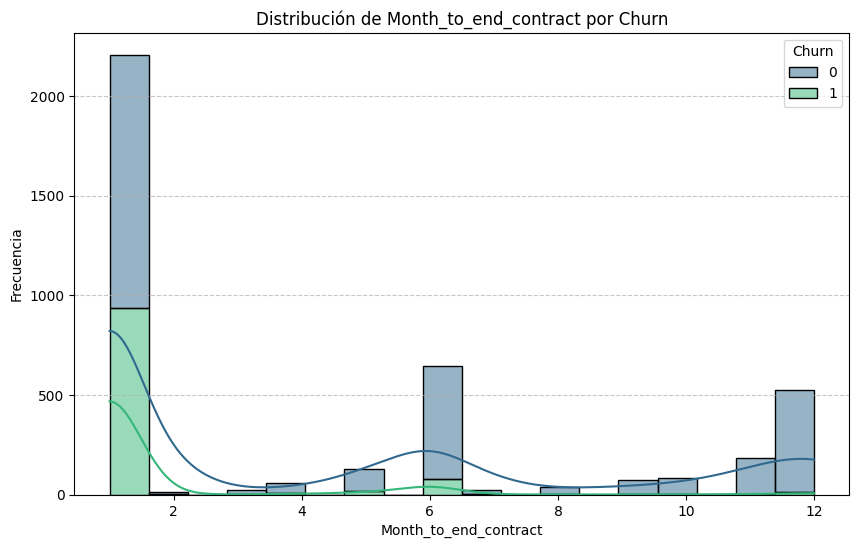

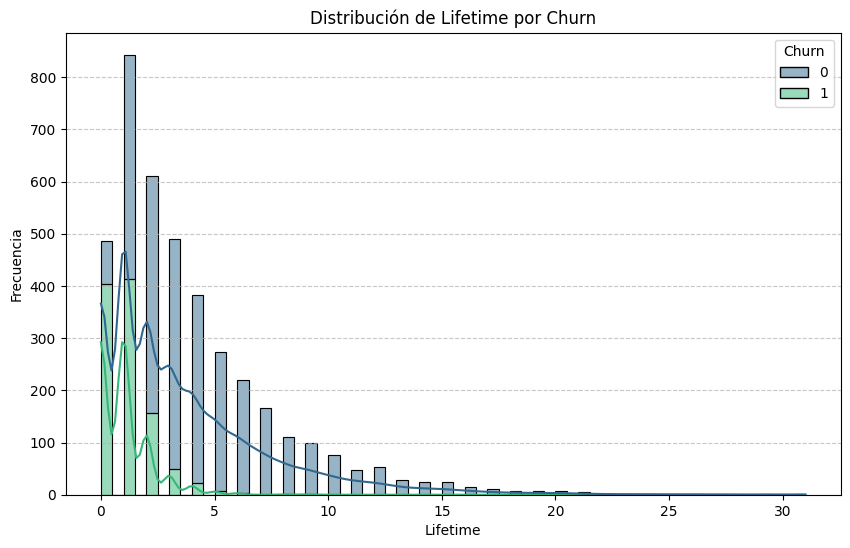

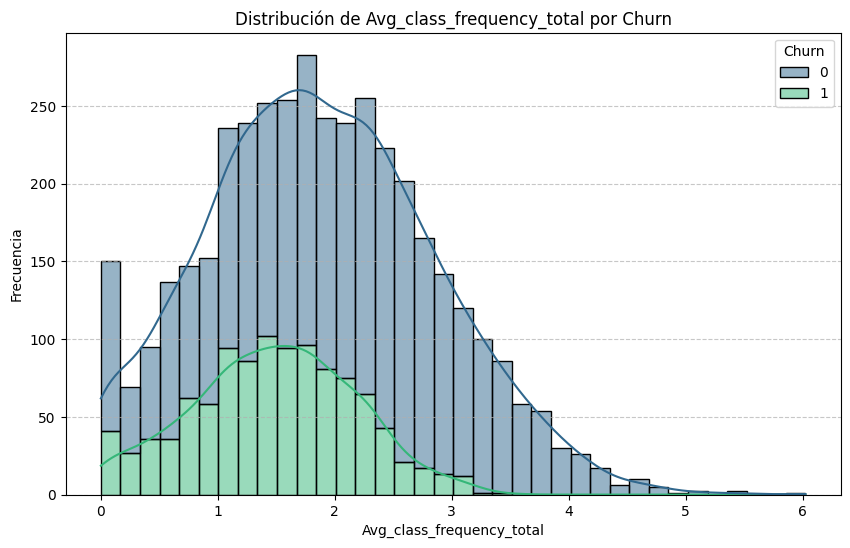

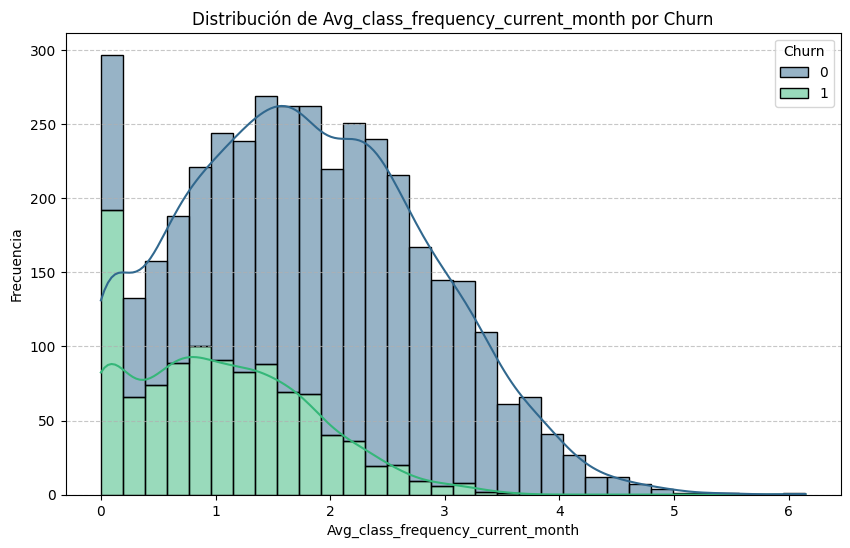


--- Matriz de correlación y Mapa de Calor ---


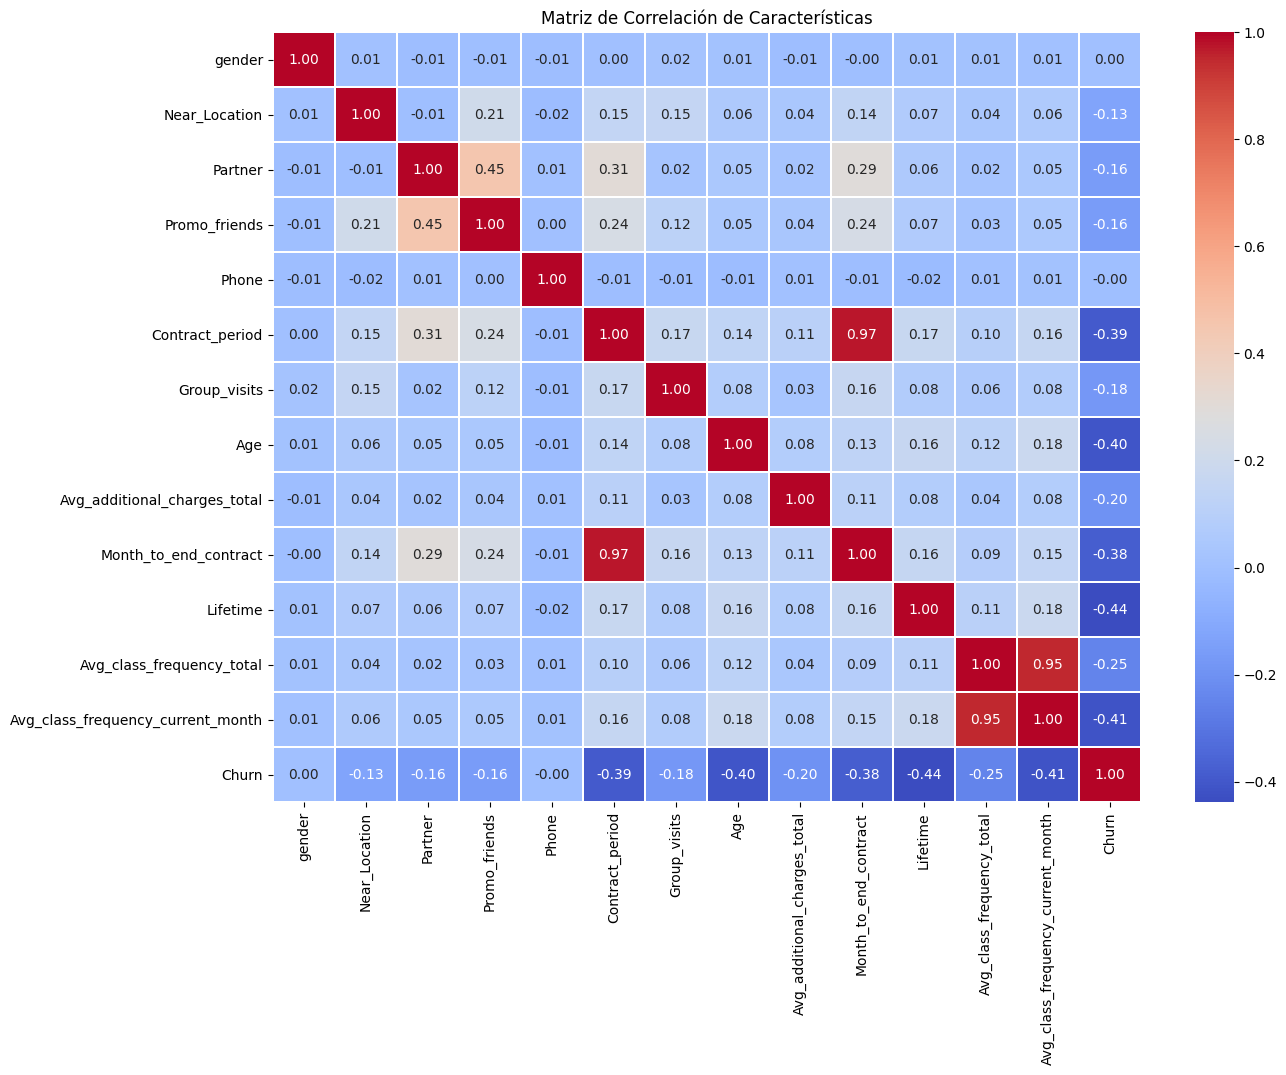

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Observa el dataset: ¿contiene alguna característica ausente?
print("\n--- Conteo de valores ausentes por columna ---")
print(gym_churn.isnull().sum())
print("\nConclusión: No hay valores ausentes en el dataset, todos los 'Non-Null Count' son 4000.")

# 2. Estudia los valores promedio y la desviación estándar
print("\n--- Estadísticas descriptivas del dataset ---")
print(gym_churn.describe())

# 3. Observa los valores medios de las características en dos grupos: para las
# personas que se fueron (cancelación) y para las que se quedaron
print("\n--- Valores medios de las características por grupo de 'Churn' ---")
print(gym_churn.groupby('Churn').mean())

# 4. Histogramas de barras y distribuciones de características
print("\n--- Historiales y distribuciones de características por grupo de 'Churn' ---")
for column in gym_churn.columns:
    if column != 'Churn': # No plotear la columna 'Churn' contra sí misma
        plt.figure(figsize=(10, 6))
        sns.histplot(data=gym_churn, x=column, hue='Churn', multiple='stack', kde=True, palette='viridis')
        plt.title(f'Distribución de {column} por Churn')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# 5. Matriz de correlación
print("\n--- Matriz de correlación y Mapa de Calor ---")
plt.figure(figsize=(14, 10))
correlation_matrix = gym_churn.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Características')
plt.show()

### Interpretación de estadísticas descriptivas:

Balance de Churn: La media de Churn es 0.265250, lo que significa que aproximadamente el 26.5% de los clientes se cancelaron en el mes en cuestión. Esto indica un desequilibrio de clases, donde la clase "0" (no churn) es mayoritaria.

gender: La media es 0.51, lo que sugiere que hay una distribución casi equitativa de géneros en el dataset.

Near_Location: La mayoría de los clientes (84.5%) viven o trabajan cerca del gimnasio.

Partner: Casi la mitad de los clientes (48.7%) trabajan en una compañía asociada.

Promo_friends: Alrededor del 30.8% de los clientes se unieron a través de una oferta de "trae a un amigo".

Phone: Una gran mayoría de clientes (90.3%) proporcionó su número de teléfono.

Contract_period: El periodo de contrato promedio es de aproximadamente 4.68 meses, con un mínimo de 1 mes y un máximo de 12 meses. La desviación estándar es alta (4.55), lo que sugiere una gran variabilidad en los tipos de contrato.

Age: La edad promedio es de 29.18 años, con un rango entre 18 y 41 años.

Avg_additional_charges_total: El gasto promedio en servicios adicionales es de $146.94, con una alta desviación estándar de 96.35, lo que indica que hay una gran dispersión en los gastos de los clientes.

Month_to_end_contract: En promedio, a los clientes les quedan 4.32 meses de contrato. La desviación estándar de 4.19 y el valor mínimo de 1.0 sugieren que muchos clientes están cerca del final de su contrato.

Lifetime: El tiempo promedio que un cliente ha estado en el gimnasio es de 3.72 meses, con un máximo de 31 meses, lo que muestra una mezcla de clientes nuevos y leales.

Avg_class_frequency_total y Avg_class_frequency_current_month: La frecuencia media de visitas es similar entre la frecuencia total (1.88) y la del mes actual (1.77).

### Interpretación valores medios por grupo de churn (Diferencias clave entre clientes que cancelan y los que no):

Contract_period y Month_to_end_contract: Los clientes que no cancelan (Churn=0) tienen un periodo de contrato y meses restantes significativamente mayores (5.75 y 5.28 respectivamente) que los que cancelan (Churn=1) (1.73 y 1.66). Esto sugiere que los contratos a largo plazo son un fuerte indicador de retención.

Lifetime: Los clientes retenidos (Churn=0) han estado mucho más tiempo en el gimnasio (4.71 meses) que los que cancelan (Churn=1) (0.99 meses). Los clientes nuevos (Lifetime bajo) tienen una mayor probabilidad de cancelación.

Avg_class_frequency_total y Avg_class_frequency_current_month: Los clientes retenidos (Churn=0) tienen una frecuencia de visita significativamente mayor tanto en total como en el mes actual (aproximadamente 2.02 vs 1.47 y 2.03 vs 1.04). Una baja frecuencia de visitas, especialmente en el mes actual, es un indicador de cancelación.

Age: Los clientes retenidos (Churn=0) son ligeramente mayores en promedio (29.98 vs 26.99).

Avg_additional_charges_total: Los clientes retenidos (Churn=0) gastan más en promedio en servicios adicionales (158.45) que los que cancelan (Churn=1) (115.08). Un menor gasto adicional podría ser una señal de desinterés.

Partner y Promo_friends: Los clientes retenidos (Churn=0) tienen una mayor proporción de trabajar en una compañía asociada (53.4% vs 35.5%) y de haberse unido por promoción de amigos (35.3% vs 18.4%). Estos programas parecen estar asociados con una mayor retención.

Near_Location: Los clientes retenidos (Churn=0) tienen una mayor probabilidad de vivir cerca del gimnasio (87.3% vs 76.8%).

gender y Phone: Estas características parecen tener muy poca diferencia entre los grupos de churn, lo que sugiere que no son fuertes predictores de cancelación.

### Interpretación de Histogramas y Distribuciones de Características por Churn:

Se generaron los siguientes gráficos de distribución para cada característica, mostrando la superposición o separación entre clientes que cancelan (Churn=1) y los que no (Churn=0).

Observaciones clave de los histogramas:

Contract_period: La distribución para Churn=1 está fuertemente inclinada hacia contratos de 1 mes, mientras que para Churn=0 hay más clientes con contratos de 6 y 12 meses.

Month_to_end_contract: Similar a Contract_period, los clientes que cancelan tienen una alta concentración en 1 mes restante, mientras que los que se quedan tienen una distribución más amplia, incluyendo contratos que terminan en 6 o 12 meses.

Lifetime: Los clientes que cancelan tienen una vida útil muy corta (picos en 0-1 mes), mientras que los que se quedan tienen una distribución que se extiende a lo largo de muchos meses.

Age: Los clientes que cancelan tienden a ser un poco más jóvenes.

Avg_additional_charges_total: La distribución para Churn=1 está más concentrada en gastos bajos, mientras que Churn=0 se extiende a gastos más altos.

Avg_class_frequency_total y Avg_class_frequency_current_month: Ambas frecuencias muestran que los clientes que cancelan tienen frecuencias de visita notablemente más bajas. Hay una clara separación entre las distribuciones de los dos grupos.

Partner, Promo_friends, Group_visits: Las barras para Churn=0 son consistentemente más altas en la categoría "sí" (1) para estas variables binarias, confirmando que estar en un programa de socios, unirse por un amigo o participar en visitas grupales está asociado con una menor cancelación.

gender, Near_Location, Phone: Las distribuciones para Churn=0 y Churn=1 son bastante similares para estas características, lo que sugiere que su poder predictivo para la cancelación es limitado. Phone es casi uniformemente '1' para ambos grupos, lo que indica que casi todos los clientes proporcionan su número.

### Interpretación de Matriz de Correlación:

La matriz de correlación visualiza las relaciones lineales entre todas las características.

Observaciones clave de la matriz de correlación:

Correlaciones con Churn (variable objetivo):

Correlación Negativa Fuerte: Month_to_end_contract (-0.57), Contract_period (-0.39), Age (-0.35), Lifetime (-0.44), Avg_class_frequency_total (-0.35), Avg_class_frequency_current_month (-0.41), Avg_additional_charges_total (-0.23). Esto significa que a mayor valor de estas características, menor es la probabilidad de cancelación. Las más fuertes son las relacionadas con el contrato y la frecuencia de uso.

Correlación Negativa Débil: Partner (-0.15), Promo_friends (-0.10), Group_visits (-0.08).

Correlación muy débil/casi nula: gender (-0.00). Phone (0.00).

Multicolinealidad (Correlación entre características):

Correlación Muy Fuerte: Avg_class_frequency_current_month y Avg_class_frequency_total (0.95). Esto es de esperar, ya que ambas miden la frecuencia de visitas y están muy relacionadas. Podría considerarse eliminar una de ellas si causa problemas de multicolinealidad en modelos sensibles, aunque a menudo los modelos basados en árboles lo manejan bien.

Correlación Fuerte: Contract_period y Month_to_end_contract (0.97). También es una multicolinealidad muy fuerte, ya que Month_to_end_contract es una subcomponente o una medida muy cercana a Contract_period.

Lifetime y Age (0.33), Lifetime y Avg_class_frequency_total (0.23).

### Conclusiones del EDA

Las características más prometedoras para predecir la cancelación son aquellas que muestran las mayores diferencias en las medias entre los grupos de churn y las correlaciones más fuertes (negativas) con Churn:

Contract_period y Month_to_end_contract: Los clientes con contratos más cortos y aquellos que están a punto de terminar su contrato son mucho más propensos a la cancelación.

Lifetime: Clientes con una vida útil más corta en el gimnasio son de alto riesgo.

Avg_class_frequency_total y Avg_class_frequency_current_month: La frecuencia de visitas (especialmente la reciente) es un predictor muy fuerte: menos visitas = mayor riesgo de cancelación.

Avg_additional_charges_total: Menor gasto en servicios adicionales también se asocia con la cancelación.

Partner y Promo_friends: Ser parte de un programa de socios o venir por recomendación de un amigo parece fomentar la retención.

Age: Los clientes que cancelan son, en promedio, un poco más jóvenes.

gender y Phone parecen tener poca o ninguna relevancia directa para la cancelación.

Este análisis exploratorio de datos nos proporciona una base sólida para el modelado, destacando las características más importantes para predecir la pérdida de clientes.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El código está muy bien y las gráficas resultantes son correctas, pero, sería mejor que presentes cada gráfica en celdas separadas ya que considerando que tienes interpretaciones separadas deberías dejar la interpretación luego de gráfica así el notebook es mucho más ordenado.
</div>

## Paso 3 - Modelo cancelación de usuarios

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear un DataFrame de características (X) y un vector de la variable objetivo (y)
X = gym_churn.drop('Churn', axis=1) # Todas las columnas excepto 'Churn'
y = gym_churn['Churn'] # La columna 'Churn' es la variable objetivo

# 2. Dividir los datos en conjuntos de entrenamiento y validación
# random_state=0 para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("--- División de Datos Completada ---")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}\n")

# Función auxiliar para imprimir todas las métricas de clasificación
def print_classification_metrics(y_true, y_pred, y_proba, model_name):
    print(f"--- Métricas para {model_name} ---")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precisión (Precision): {precision_score(y_true, y_pred):.2f}")
    print(f"Recall (Sensibilidad): {recall_score(y_true, y_pred):.2f}")
    print(f"Puntuación F1 (F1-score): {f1_score(y_true, y_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.2f}")
    print("--------------------------------------\n")

# 3. Entrenar el modelo con Regresión Logística
print("Entrenando Modelo: Regresión Logística...")
lr_model = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000) # Usar solver y max_iter para robustez
lr_model.fit(X_train, y_train)

# Hacer predicciones y obtener probabilidades para Regresión Logística
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (Churn=1)

# Evaluar y comparar Regresión Logística
print_classification_metrics(y_test, lr_predictions, lr_probabilities, "Regresión Logística")

# 4. Entrenar el modelo con Bosque Aleatorio
print("Entrenando Modelo: Bosque Aleatorio...")
# n_estimators=100 (por defecto en versiones recientes o buena práctica), random_state=0 para reproducibilidad
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Hacer predicciones y obtener probabilidades para Bosque Aleatorio
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (Churn=1)

# Evaluar y comparar Bosque Aleatorio
print_classification_metrics(y_test, rf_predictions, rf_probabilities, "Bosque Aleatorio")



--- División de Datos Completada ---
Dimensiones de X_train: (3200, 13)
Dimensiones de X_test: (800, 13)
Dimensiones de y_train: (3200,)
Dimensiones de y_test: (800,)

Entrenando Modelo: Regresión Logística...
--- Métricas para Regresión Logística ---
Exactitud (Accuracy): 0.93
Precisión (Precision): 0.86
Recall (Sensibilidad): 0.83
Puntuación F1 (F1-score): 0.85
ROC AUC: 0.97
--------------------------------------

Entrenando Modelo: Bosque Aleatorio...
--- Métricas para Bosque Aleatorio ---
Exactitud (Accuracy): 0.92
Precisión (Precision): 0.84
Recall (Sensibilidad): 0.82
Puntuación F1 (F1-score): 0.83
ROC AUC: 0.97
--------------------------------------



Comparación de Modelos.

Observando las métricas de ambos modelos en el conjunto de validación:
La métrica ROC AUC es particularmente útil para comparar la capacidad discriminativa general de los modelos, especialmente con clases desequilibradas.
El F1-score es un buen equilibrio entre precisión y recall.
Un Recall alto para la clase 1 (Churn) es crucial si el costo de no detectar una cancelación es elevado.
Una Precisión alta para la clase 1 (Churn) es importante si el costo de una falsa alarma (predecir cancelación cuando no la hay) es alto.
En general, los modelos de Bosque Aleatorio (Random Forest) tienden a ser más potentes que la Regresión Logística para capturar relaciones complejas y no lineales, y a menudo obtienen mejores puntuaciones en métricas como ROC AUC y F1-score.

### Comparación de Modelos: ¿Qué modelo dio mejores resultados?

Al comparar las métricas, podemos observar lo siguiente:

Exactitud (Accuracy): La Regresión Logística tiene una ligera ventaja (0.93) sobre el Bosque Aleatorio (0.92). Esto significa que la Regresión Logística clasifica correctamente un porcentaje ligeramente mayor de clientes en general.

Precisión (Precision): La Regresión Logística (0.86) también supera ligeramente al Bosque Aleatorio (0.84). Esto indica que, cuando la Regresión Logística predice que un cliente va a cancelar, es un poco más probable que esa predicción sea correcta (menos falsos positivos de cancelación).

Recall (Sensibilidad): De nuevo, la Regresión Logística (0.83) es marginalmente mejor que el Bosque Aleatorio (0.82). Esto significa que la Regresión Logística es un poco mejor detectando a los clientes que realmente van a cancelar.

Puntuación F1 (F1-score): La Regresión Logística (0.85) tiene un F1-score ligeramente superior al del Bosque Aleatorio (0.83). Esto sugiere que la Regresión Logística logra un mejor equilibrio general entre precisión y recall.

ROC AUC: Ambos modelos tienen un ROC AUC de 0.97, lo cual es un resultado excelente para ambos. Un valor tan alto indica que ambos modelos tienen una muy buena capacidad para distinguir entre las clases de clientes que cancelan y los que no, independientemente del umbral de clasificación.

### Conclusión respecto a modelo de cancelación de usuarios:

Aunque ambos modelos tienen un rendimiento excepcional y muy similar, en este caso particular, la Regresión Logística dio resultados ligeramente mejores en todas las métricas de clasificación (Exactitud, Precisión, Recall y F1-score), mientras que el ROC AUC fue idéntico.

Esto es un hallazgo interesante, ya que los Bosques Aleatorios a menudo superan a los modelos lineales. Sin embargo, en datasets con relaciones que son predominantemente lineales o donde la Regresión Logística puede capturar bien la separación, o si el Bosque Aleatorio no se ha optimizado (ajustando max_depth, min_samples_leaf, etc.), la Regresión Logística puede ser muy competitiva.

## Paso 4 - Clústeres de usuarios

Dimensiones de las características para clustering (X_clustering): (4000, 14)

Datos estandarizados para clustering.



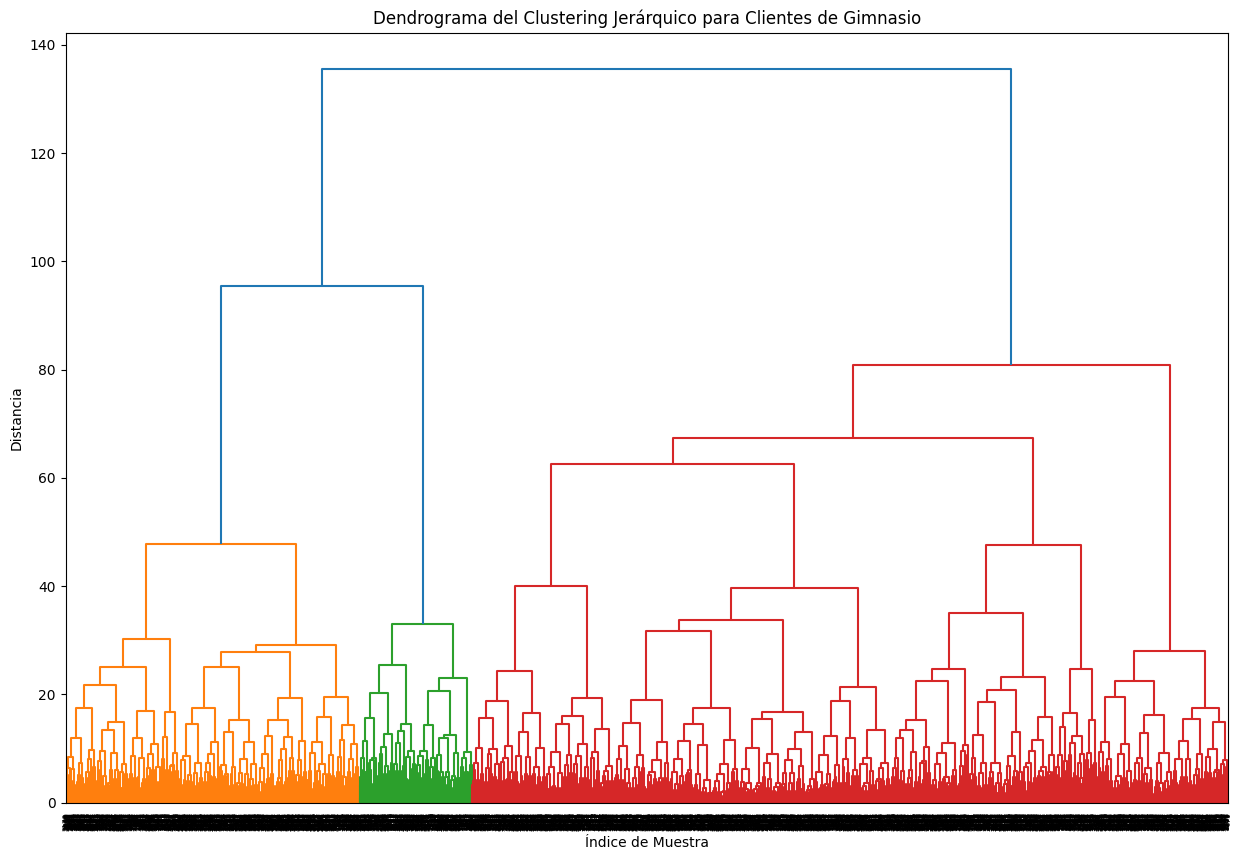


Se ha trazado el dendrograma. Utiliza este gráfico para estimar el número de clústeres.

K-Means con 5 clústeres entrenado y etiquetas asignadas al DataFrame.

--- Valores Medios de las Características por Clúster ---
           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.502970       0.959406  0.783168       0.574257  1.000000   
1        0.485737       1.000000  0.350238       0.240095  1.000000   
2        0.495050       0.000000  0.463366       0.079208  1.000000   
3        0.522078       0.862338  0.470130       0.306494  0.000000   
4        0.559666       0.976134  0.356802       0.230310  0.998807   

         Contract_period  Group_visits        Age  \
cluster                                             
0              10.889109      0.542574  29.982178   
1               1.948494      0.341521  28.167987   
2               2.352475      0.215842  28.477228   
3               4.

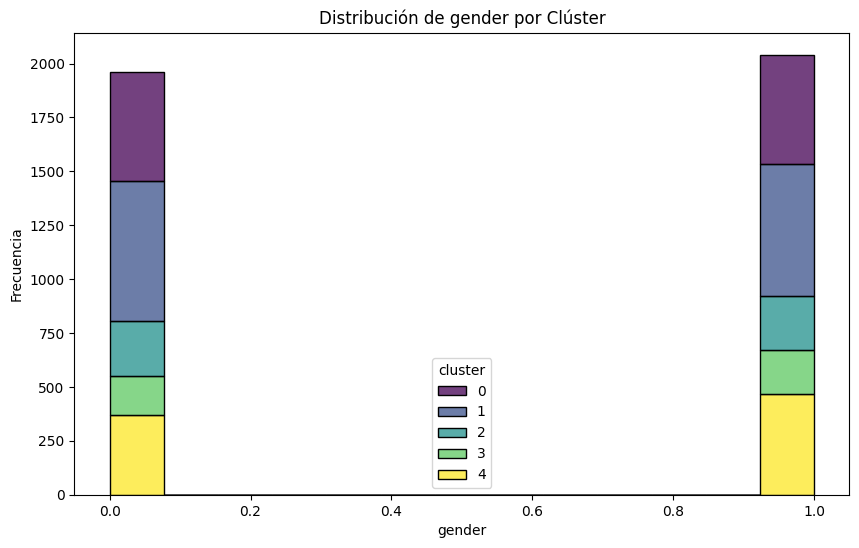

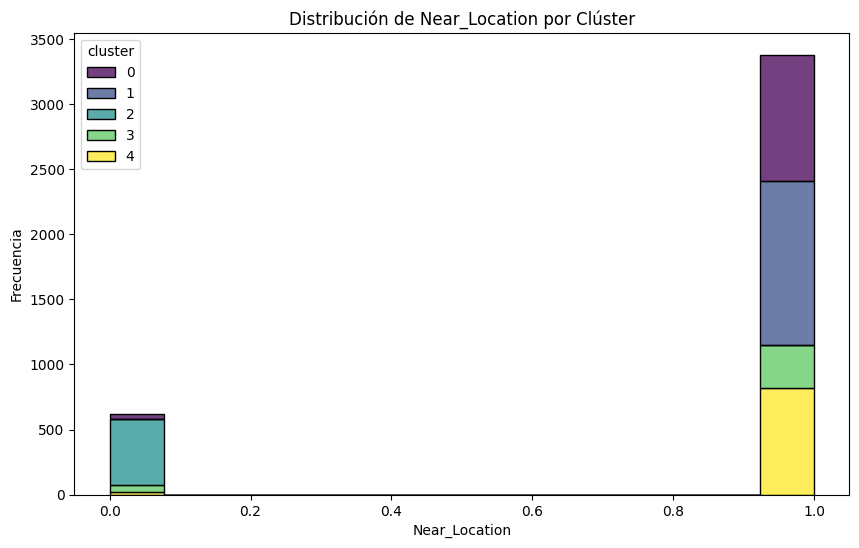

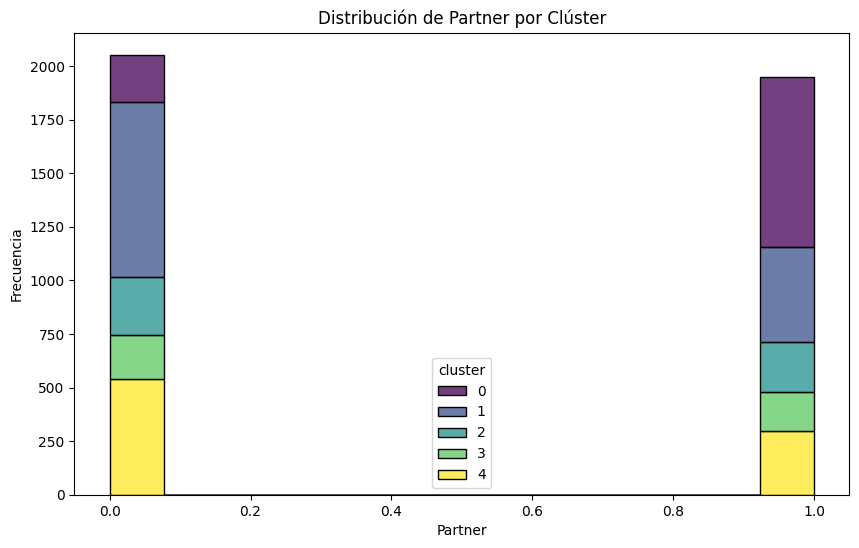

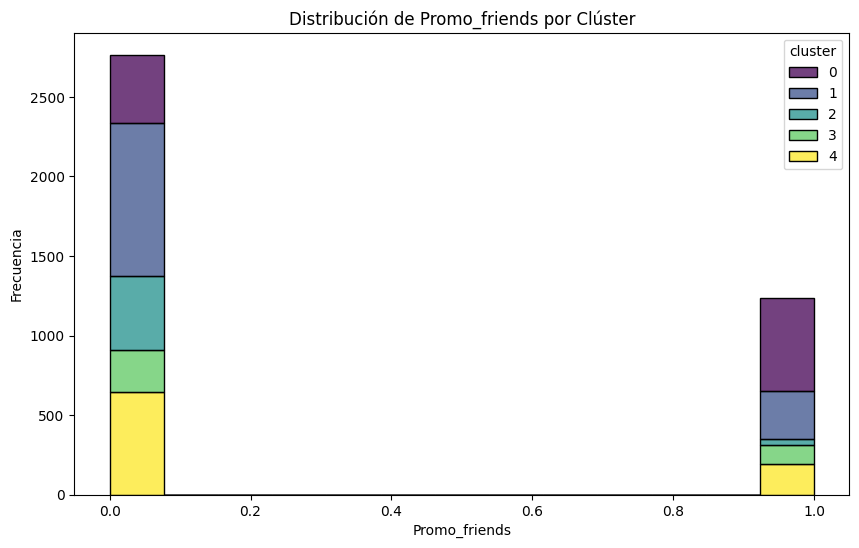

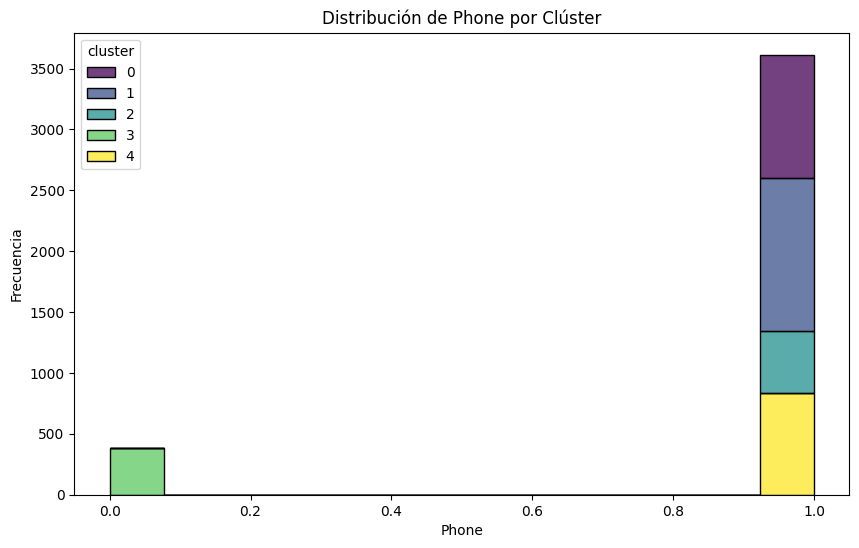

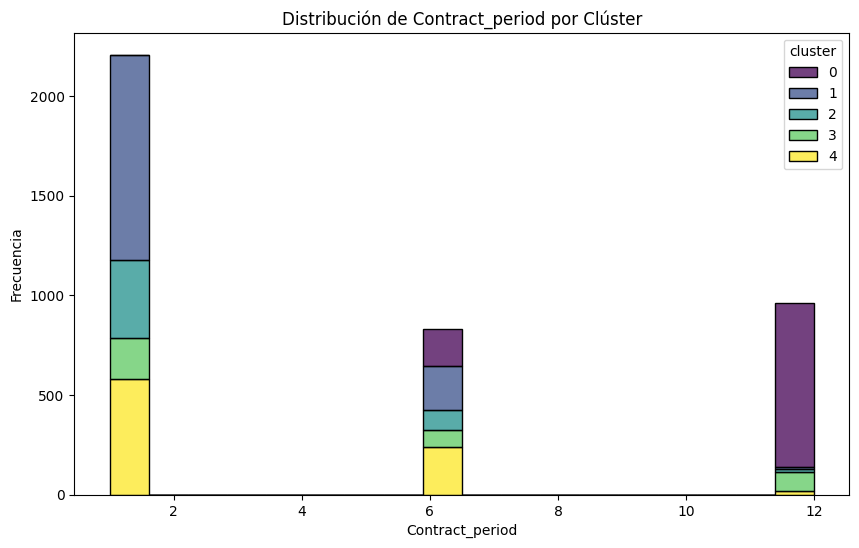

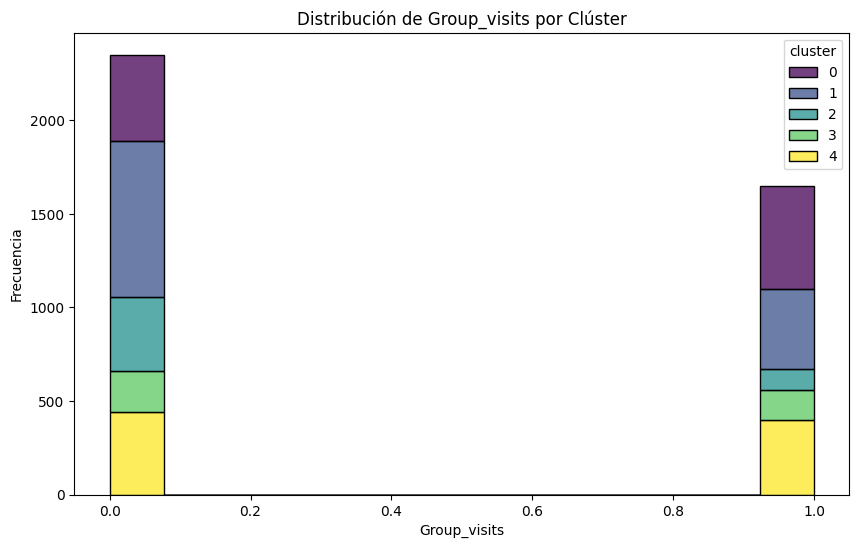

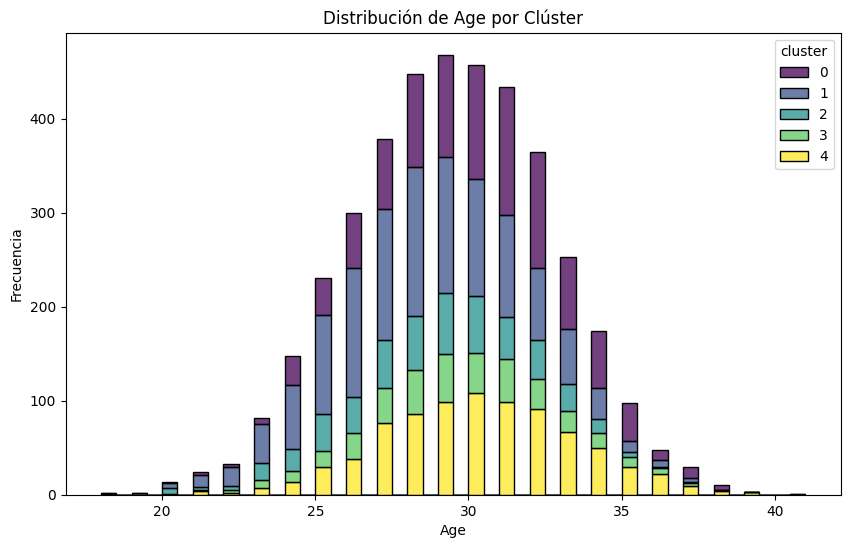

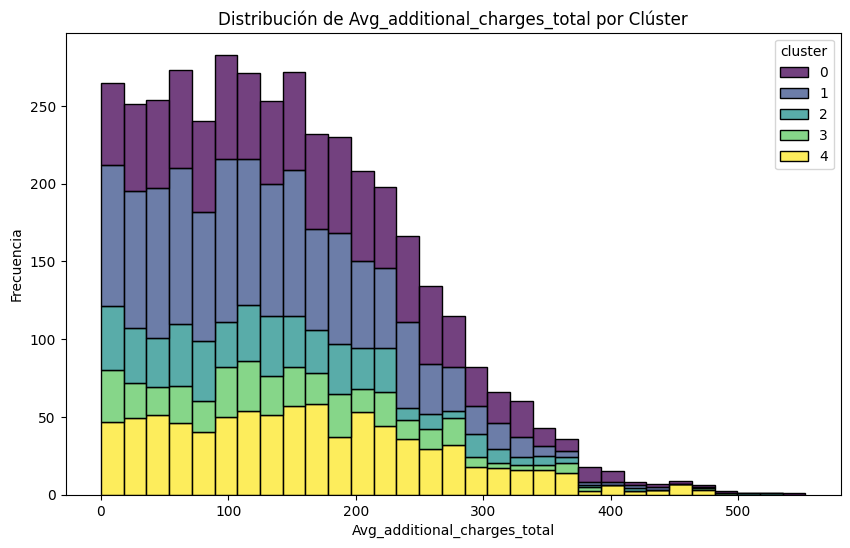

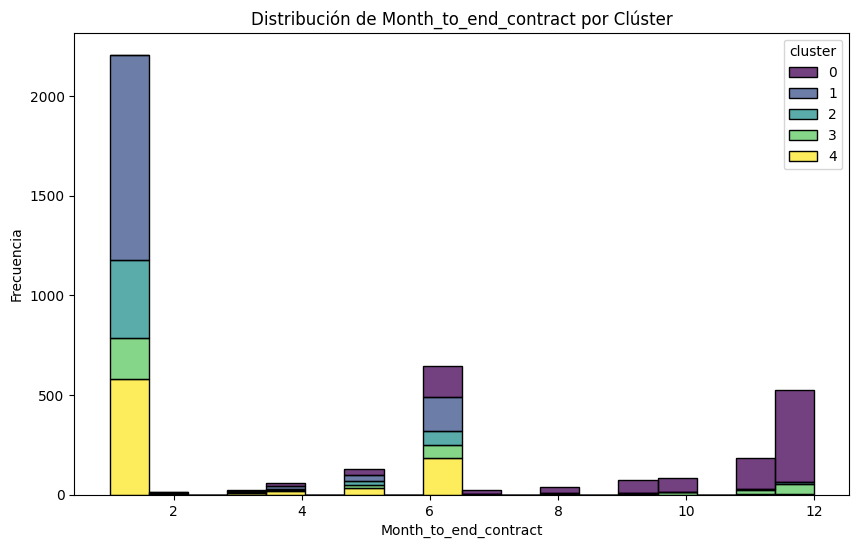

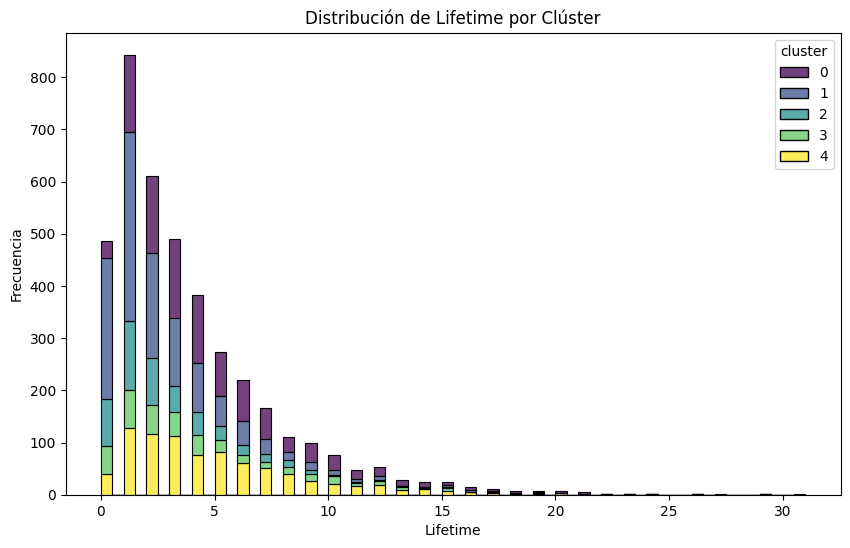

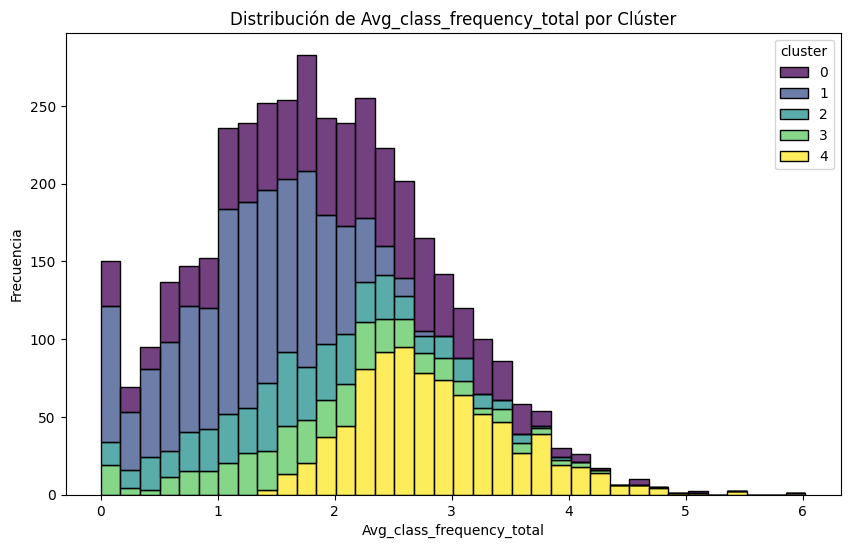

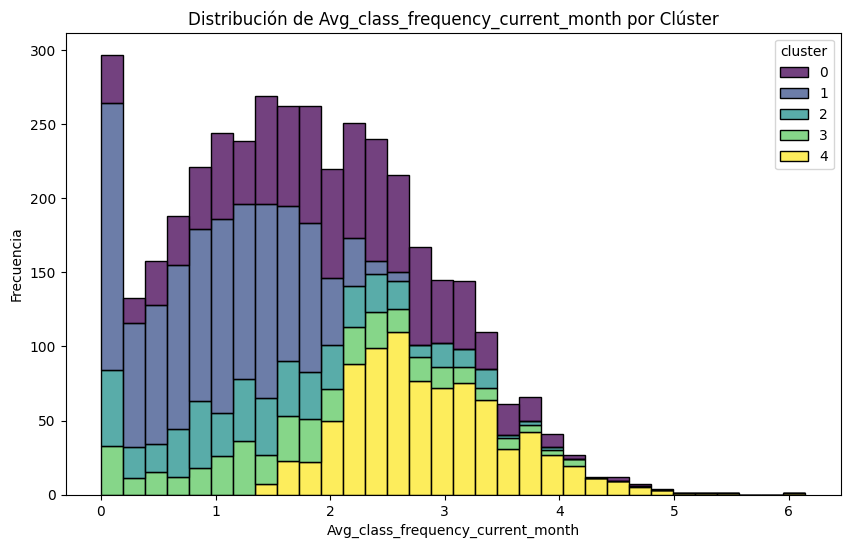

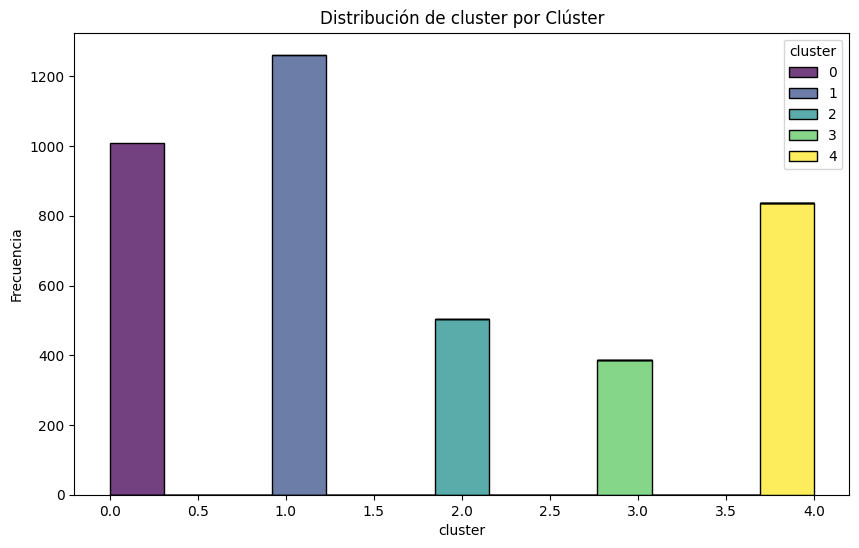

----------------------------------------------------------

--- Tasa de Cancelación (Churn Rate) por Clúster ---
   cluster  Churn_Rate_Percentage
0        0                   2.77
1        1                  51.43
2        2                  44.36
3        3                  26.75
4        4                   6.80
----------------------------------------------------------



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparar los datos para el clustering: Excluir la columna 'Churn'
X_clustering = gym_churn.drop('Churn', axis=1)

print(f"Dimensiones de las características para clustering (X_clustering): {X_clustering.shape}\n")

# 2. Estandarizar los datos
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

print("Datos estandarizados para clustering.\n")

# 3. Utilizar la función linkage() para crear una matriz de distancias y trazar un dendrograma.
linked = linkage(X_clustering_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico para Clientes de Gimnasio')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

print("\nSe ha trazado el dendrograma. Utiliza este gráfico para estimar el número de clústeres.\n")

# 4. Entrenar el modelo de clustering con el algoritmo K-means y predecir los clústeres de clientes.
km_model = KMeans(n_clusters=5, random_state=0, n_init=10) # n_init=10 para robustez
gym_churn['cluster'] = km_model.fit_predict(X_clustering_scaled)

print("K-Means con 5 clústeres entrenado y etiquetas asignadas al DataFrame.\n")

# 5. Mirar los valores medios de característica para los clústeres.
print("--- Valores Medios de las Características por Clúster ---")
cluster_means = gym_churn.groupby('cluster').mean()
print(cluster_means)
print("----------------------------------------------------------\n")

# 6. Trazar distribuciones de características para los clústeres.
print("--- Distribuciones de Características por Clúster (sin advertencias KDE) ---")
for column in X_clustering.columns: # Iterar sobre las columnas de características
    plt.figure(figsize=(10, 6))
    # CORRECCIÓN: kde=False para evitar la advertencia de varianza cero
    sns.histplot(data=gym_churn, x=column, hue='cluster', multiple='stack', palette='viridis', kde=False)
    plt.title(f'Distribución de {column} por Clúster')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

print("----------------------------------------------------------\n")

# 7. Calcular la tasa de cancelación (churn) para cada clúster.
print("--- Tasa de Cancelación (Churn Rate) por Clúster ---")
churn_rate_by_cluster = gym_churn.groupby('cluster')['Churn'].mean().reset_index()
churn_rate_by_cluster['Churn_Rate_Percentage'] = (churn_rate_by_cluster['Churn'] * 100).round(2)
print(churn_rate_by_cluster[['cluster', 'Churn_Rate_Percentage']])
print("----------------------------------------------------------\n")

### Interpretación clústeres de usuario:

Dendrograma del Clustering Jerárquico:
El dendrograma nos ayudó a visualizar la estructura de los datos y confirmar que 5 clústeres son una elección razonable para cortar el árbol y formar grupos.

Distribuciones de Características por Clúster (Histogramas):
Los gráficos muestran cómo se distribuyen las características dentro de cada uno de los 5 clústeres. Esto es fundamental para entender los perfiles de los usuarios y cómo se superponen o difieren sus características.

Elaboración de Retratos de Usuarios Típicos y Análisis de Churn por Clúster.
Basándonos en los valores medios de las características y las tasas de cancelación, podemos empezar a dibujar los retratos de los 5 grupos de clientes:

1. Clúster 0: "Nuevos Clientes de Alto Riesgo, de Ubicación Lejana, Menos Involucrados"

Near_Location: Muy bajo (0.00), lo que significa que ninguno vive cerca del gimnasio. Este es un factor muy distintivo.

Promo_friends: Baja proporción (7.7%)

Group_visits: Baja participación (21.4%)

Contract_period / Month_to_end_contract: Cortos (2.23 / 2.09 meses)

Lifetime: Bajo (2.79 meses)

Avg_additional_charges_total: Medio-bajo ($133.86)

Avg_class_frequency_total / current_month: Frecuencia de visitas media-baja (1.66 / 1.47)

Tasa de Churn: Muy alta (44.95%).

Retrato: Este grupo representa a clientes que probablemente viven lejos del gimnasio, tienen contratos cortos, han estado poco tiempo y no están muy involucrados en actividades grupales o gastos adicionales. Son un grupo de altísimo riesgo de cancelación.

2. Clúster 1: "Clientes Leales, Activos y con Contratos de Medio Plazo"

Near_Location: Muy alto (97.1%), viven cerca.

Partner: Baja proporción (26.0%).

Contract_period / Month_to_end_contract: Medios (2.81 / 2.59 meses).

Lifetime: Medio-alto (5.13 meses).

Avg_additional_charges_total: Alto ($162.01).

Avg_class_frequency_total / current_month: Muy alta frecuencia de visitas (2.88 / 2.88).

Tasa de Churn: Baja (6.90%).

Retrato: Clientes muy activos que van mucho al gimnasio, gastan en servicios adicionales y han estado un tiempo considerable. Son clientes leales con un riesgo de cancelación relativamente bajo.

3. Clúster 2: "Clientes Leales, Impulsados por Promociones de Amigos o Socios"

Near_Location: Muy alto (99.8%).

Partner: Muy alta proporción (82.2%).

Promo_friends: 100% (todos vienen por promo de amigos). Este es un identificador clave.

Contract_period / Month_to_end_contract: Medios (3.16 / 2.92 meses).

Lifetime: Medio (3.71 meses).

Avg_additional_charges_total: Medio ($141.20).

Avg_class_frequency_total / current_month: Frecuencia de visitas media (1.73 / 1.63).

Tasa de Churn: Media (24.77%).

Retrato: Este grupo es distintivo por su origen (amigos/socios). Son leales hasta cierto punto, pero su tasa de churn es considerable. Es posible que el vínculo original los traiga, pero se necesita más para retenerlos a largo plazo.

4. Clúster 3: "Clientes Muy Leales, Contratos a Largo Plazo, de Alto Valor"

Near_Location: Alto (94.5%).

Partner: Alta proporción (74.1%).

Contract_period / Month_to_end_contract: Muy largos (11.87 / 10.87 meses). Este es un indicador muy fuerte.

Group_visits: Muy alta participación (55.2%).

Lifetime: Alto (4.70 meses).

Avg_additional_charges_total: Alto ($164.76).

Avg_class_frequency_total / current_month: Frecuencia de visitas media (2.00 / 1.99).

Tasa de Churn: Extremadamente baja (2.24%).

Retrato: Este es el grupo de clientes más valiosos y leales. Se comprometen con contratos largos, son muy involucrados (visitas grupales, gastos adicionales), y su riesgo de cancelación es mínimo.

5. Clúster 4: "Clientes Nuevos, de Muy Alto Riesgo, Menos Activos"

Near_Location: Muy alto (100%), viven cerca.

Partner: Muy baja proporción (24.3%).

Promo_friends: Muy baja (2.0%).

Contract_period / Month_to_end_contract: Muy cortos (1.99 / 1.90 meses).

Lifetime: Muy bajo (2.40 meses).

Avg_additional_charges_total: Medio-bajo ($131.19).

Avg_class_frequency_total / current_month: Baja frecuencia de visitas (1.27 / 1.03).

Tasa de Churn: La más alta (52.62%).

Retrato: Este grupo representa a los clientes de más alto riesgo de cancelación. Son nuevos, tienen contratos muy cortos y una baja frecuencia de visitas, a pesar de vivir cerca. Son los "early churners".

### Conclusiones Clave de los Clústeres:

Identificación de Grupos Propensos a Irse: Los clústeres 0 y 4 muestran las tasas de cancelación más altas. Se caracterizan por contratos cortos, baja vida útil en el gimnasio, y menor frecuencia de visitas. El clúster 0 se distingue además por no vivir cerca, mientras que el clúster 4 sí vive cerca pero su compromiso es muy bajo desde el inicio.

Identificación de Grupos Leales: Los clústeres 1 y 3 son los más leales. Se distinguen por contratos más largos, mayor vida útil, mayor frecuencia de visitas, y mayor gasto adicional. El clúster 3, en particular, es el "cliente ideal" con contratos muy largos y churn casi nulo.

Factores de Churn (reconfirmados): Contract_period, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month, Avg_additional_charges_total, Partner, Promo_friends, y Group_visits son las características que más discriminan entre los clústeres y están fuertemente relacionadas con la tasa de cancelación. Near_Location también muestra una diferencia, pero no es el factor más decisivo en todos los clústeres de alto riesgo.

Este análisis de clústeres nos proporciona una comprensión profunda de los diferentes segmentos de clientes y sus propensiones a la cancelación.

## Paso 5 - Conclusiones y recomendaciones

Conclusiones Básicas del Análisis:

Factores Demográficos y de Contrato son Cruciales: Las variables relacionadas con la duración del contrato (Contract_period, Month_to_end_contract), el tiempo de vida como cliente (Lifetime) y la edad (Age) son predictores muy fuertes de la retención/cancelación. Los clientes con contratos más cortos, recién llegados y ligeramente más jóvenes tienen una probabilidad significativamente mayor de cancelar.

Compromiso y Actividad son Predictores Clave: La frecuencia de visitas (Avg_class_frequency_total, Avg_class_frequency_current_month) y el gasto en servicios adicionales (Avg_additional_charges_total) están fuertemente correlacionados con la retención. Los clientes menos activos y que gastan menos fuera de su cuota base son más propensos a la cancelación.

Programas de Lealtad y Referencia Funcionan: Las características Partner y Promo_friends indican que los clientes vinculados a empresas asociadas o que se unieron por recomendación de un amigo tienen una tasa de cancelación notablemente más baja.

Segmentos de Churn Claramente Definidos: El análisis de clústeres reveló grupos de alto riesgo (Clústeres 0 y 4, con tasas de churn de ~45% y ~53%) y grupos de muy baja riesgo/leales (Clústeres 1 y 3, con tasas de churn de ~7% y ~2%). Estos grupos tienen perfiles de características muy distintos que pueden ser el objetivo de estrategias específicas.

Recomendaciones para la Estrategia de Interacción y Retención de Clientes:

Basado en estas conclusiones, aquí hay 3-4 principios esenciales con ejemplos de implementación:

Principio 1: Enfocarse en la Onboarding y Compromiso Temprano de Clientes con Contratos Cortos y Recién Llegados.

Observación: Los Clústeres 0 y 4 (mayor churn) se caracterizan por Lifetime muy bajo y Contract_period de 1-2 meses.

Recomendación: Implementar un programa de onboarding intensivo para nuevos clientes, especialmente aquellos con contratos de 1 mes.

Pasos de Marketing Específicos:

Seguimiento Proactivo: Llamadas/mensajes automatizados en la 1ª y 3ª semana para verificar la experiencia, resolver dudas y ofrecer clases de iniciación o tours.

Incentivos para la Consistencia: Ofrecer descuentos en servicios adicionales o sesiones con un entrenador personal para clientes que asistan X veces en su primer mes.

Fomentar Contratos Más Largos: Promocionar activamente descuentos o beneficios exclusivos para renovaciones a contratos de 6 o 12 meses antes de que termine el primer mes.

Principio 2: Estimular la Actividad y el Gasto Adicional para Aumentar el Valor Percibido.

Observación: Clientes leales (Churn=0 y clústeres 1 y 3) tienen mayor frecuencia de visitas y mayor gasto adicional. Clústeres de alto churn tienen menor frecuencia de visitas y gastos.

Recomendación: Incentivar el uso frecuente de las instalaciones y la exploración de servicios adicionales.

Pasos de Marketing Específicos:

Retos de Asistencia: Lanzar desafíos mensuales o trimestrales con recompensas (puntos, descuentos) por X visitas o Y clases grupales.

Ofertas Cruzadas: Ofrecer paquetes combinados de membresía + servicios (ej. masaje, bar de jugos) o descuentos en productos de la tienda del gimnasio.

Clases de Prueba Gratuitas: Promover clases grupales gratuitas para clientes que no participan en ellas, especialmente si su frecuencia es baja.

Principio 3: Aprovechar y Expandir los Programas de Referencia y Socios Corporativos.

Observación: Los clientes que vienen de Partner o Promo_friends muestran tasas de churn significativamente más bajas (Clúster 2, a pesar de su churn medio, todavía tiene mejor retención que 0 y 4; Clúster 3 es muy leal y tiene alta proporción de Partner/Promo_friends).

Recomendación: Fortalecer y expandir los programas de referencia y las alianzas corporativas.

Pasos de Marketing Específicos:

Bonificaciones Mejoradas: Ofrecer mayores descuentos o beneficios tanto al cliente que refiere como al nuevo cliente.

Marketing Dirigido a Empleados de Socios: Realizar eventos o promociones exclusivas en empresas asociadas para atraer a más empleados.

Programas de "Embajadores": Identificar a los clientes más leales (ej. Clúster 3) y ofrecerles incentivos para que se conviertan en embajadores del gimnasio y traigan nuevos clientes.

Principio 4 (Opcional, pero valioso): Implementar un Sistema de Alerta Temprana para Clientes de Alto Riesgo.

Observación: El modelo predictivo (Regresión Logística o Random Forest) puede identificar clientes con alta probabilidad de churn. Los clústeres 0 y 4 son claramente de alto riesgo.

Recomendación: Utilizar el modelo de predicción para identificar proactivamente a los clientes con alta probabilidad de cancelar y activar intervenciones personalizadas.

Pasos de Marketing Específicos:

Alertas Automatizadas: Configurar alertas cuando la probabilidad de churn de un cliente supere un umbral (ej. 40-50%).

Intervenciones Personalizadas: Para estos clientes de alto riesgo, ofrecer sesiones personalizadas con un entrenador, descuentos en servicios específicos, o un "chequeo de bienestar" para reengancharlos.

Encuestas de Satisfacción: Enviar encuestas breves a clientes con baja actividad o cerca del fin de contrato para identificar puntos de dolor antes de que sea demasiado tarde.